# Poisson regression

In [49]:
#code from https://github.com/thomasjpfan/ml-workshop-advanced

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set_theme(font_scale=1.5, rc={'figure.figsize': [12, 8]})
sklearn.set_config(display='diagram')

## Load London Bike Data

In [2]:
from pathlib import Path

data_path = Path("data")
bikes_path = data_path / "london_bikes.csv"

- "timestamp" - timestamp field for grouping the data 
- "cnt" - the count of a new bike shares 
- "t1" - real temperature in C 
- "t2" - temperature in C "feels like" 
- "hum" - humidity in percentage 
- "windspeed" - wind speed in km/h 
- "weathercode" - category of the weather 
- "isholiday" - boolean field - 1 holiday / 0 non holiday 
- "isweekend" - boolean field - 1 if the day is weekend 
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [3]:
bikes = pd.read_csv(bikes_path, parse_dates=['timestamp'])

In [4]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
bikes['timestamp'].head()

0   2015-01-04 00:00:00
1   2015-01-04 01:00:00
2   2015-01-04 02:00:00
3   2015-01-04 03:00:00
4   2015-01-04 04:00:00
Name: timestamp, dtype: datetime64[ns]

In [6]:
bikes['hr'] = bikes['timestamp'].dt.hour

In [7]:
bikes['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [8]:
bikes['season'].unique()

array([3., 0., 1., 2.])

In [9]:
X = bikes[['t1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season', 'hr']]
y = bikes['cnt']

### Split data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Column Transformer

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numerical_featurse = ['t1', 't2', 'hum', 'wind_speed', 'is_holiday', 'is_weekend', 'hr']
cat_features = ['weather_code', 'season']

ct = ColumnTransformer([
    ('numerical', 'passthrough', numerical_featurse),
    ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)
    
])

### Pipeline

In [12]:
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pois_reg = Pipeline([
    ('prep', ct),
    ('scaler', StandardScaler()),
    ('reg', PoissonRegressor())
])

pois_reg

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['t1', 't2', 'hum',
                                                   'wind_speed', 'is_holiday',
                                                   'is_weekend', 'hr']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['weather_code',
                                                   'season'])])),
                ('scaler', StandardScaler()), ('reg', PoissonRegressor())])

In [13]:
pois_reg.fit(X_train, y_train);

In [14]:
pois_reg.score(X_test, y_test)

0.331281167666172

### This seems low what can we change?

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numerical_featurse = ['t1', 't2', 'hum', 'wind_speed', 'is_holiday', 'is_weekend']
cat_features = ['weather_code', 'season', 'hr']

ct = ColumnTransformer([
    ('numerical', 'passthrough', numerical_featurse),
    ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)
    
])

pois_reg = Pipeline([
    ('prep', ct),
    ('scalar', StandardScaler()),
    ('reg', PoissonRegressor())
])

pois_reg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['t1', 't2', 'hum',
                                                   'wind_speed', 'is_holiday',
                                                   'is_weekend']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['weather_code', 'season',
                                                   'hr'])])),
                ('scalar', StandardScaler()), ('reg', PoissonRegressor())])

In [16]:
pois_reg.score(X_test, y_test)

0.8156604730601431

### What about ridge?

In [17]:
from sklearn.linear_model import Ridge

ct = ColumnTransformer([
    ('numerical', 'passthrough', numerical_featurse),
    ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)
    
])

ridge = Pipeline([
    ('prep', ct),
    ('scalar', StandardScaler()),
    ('reg', Ridge(random_state=42))
])

ridge.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['t1', 't2', 'hum',
                                                   'wind_speed', 'is_holiday',
                                                   'is_weekend']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['weather_code', 'season',
                                                   'hr'])])),
                ('scalar', StandardScaler()), ('reg', Ridge(random_state=42))])

In [18]:
ridge.score(X_test, y_test)

0.7264287681524049

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

def compute_metrics(y_true, y_pred, sample_weight=None):
    
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")
        
        y_true = y_true[mask]
        y_pred = y_pred[mask]
        if sample_weight is not None:
            sample_weight = sample_weight[mask]
   
    return {
        'mse': mean_squared_error(y_true, y_pred, sample_weight=sample_weight),
        'mean poisson deviance': mean_poisson_deviance(y_true, y_pred, sample_weight=sample_weight)
    }

### Compute metrics

In [20]:
ridge_pred = ridge.predict(X_test)
compute_metrics(y_test, ridge_pred)

{'mse': 347993.3878355729, 'mean poisson deviance': 254.31140084177204}

In [21]:
poisson_pred = pois_reg.predict(X_test)
compute_metrics(y_test, poisson_pred)

{'mse': 273873.6171595357, 'mean poisson deviance': 181.15334073868877}

## Plotting the prediction distrubutions

Text(0.5, 1.0, 'Ridge predictions')

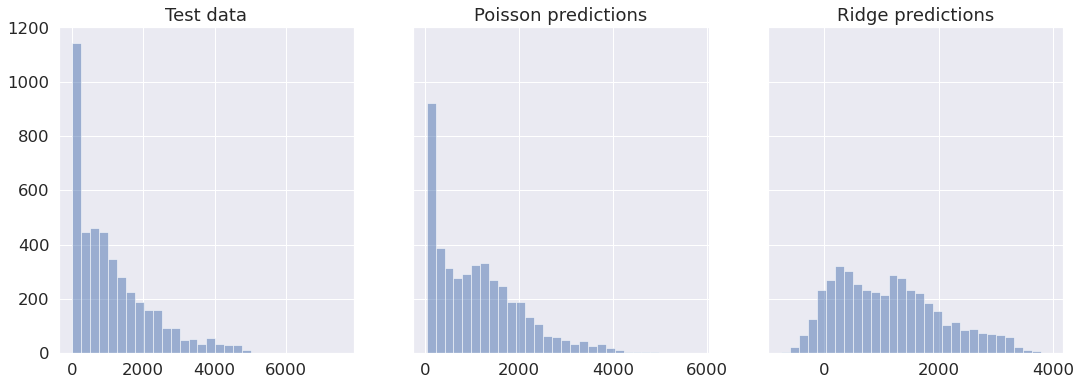

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax1.hist(y_test, bins=30, alpha=0.5)
ax1.set_title("Test data")
ax2.hist(poisson_pred, bins=30, alpha=0.5)
ax2.set_title("Poisson predictions")
ax3.hist(ridge_pred, bins=30, alpha=0.5)
ax3.set_title("Ridge predictions")

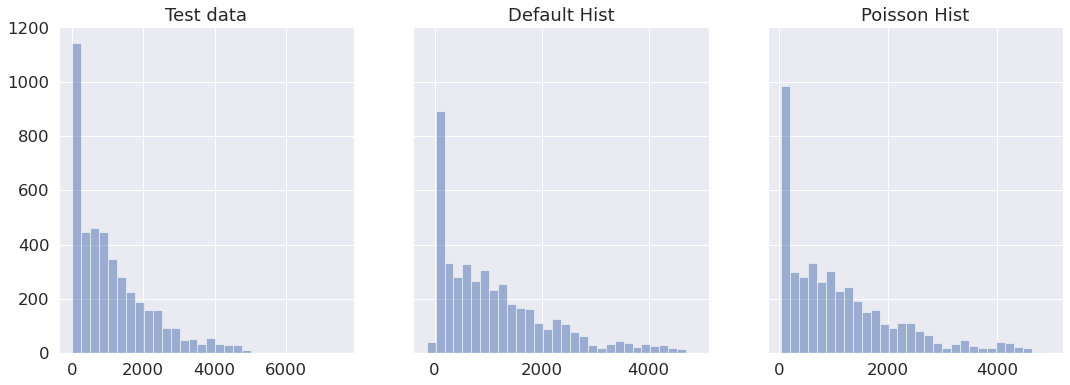

In [27]:
# %load solutions/03-ex01-solutions.py
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist = HistGradientBoostingRegressor(random_state=42)
hist.fit(X_train, y_train)
hist_pred = hist.predict(X_test)

compute_metrics(y_test, hist_pred)

hist_poisson = HistGradientBoostingRegressor(loss='poisson', random_state=42)
hist_poisson.fit(X_train, y_train)

hist_poisson_pred = hist_poisson.predict(X_test)

compute_metrics(y_test, hist_poisson_pred)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax1.hist(y_test, bins=30, alpha=0.5)
ax1.set_title("Test data")
ax2.hist(hist_pred, bins=30, alpha=0.5)
ax2.set_title("Default Hist")
ax3.hist(hist_poisson_pred, bins=30, alpha=0.5)
ax3.set_title("Poisson Hist");


## Calibration

In [28]:
from sklearn.utils import gen_even_slices

def _calibration_curve_weighted(y_true, y_pred, n_bins=10, sample_weight=None):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    idx_sort = np.argsort(y_pred)
    y_pred_bin = np.zeros(n_bins)
    y_true_bin = np.zeros(n_bins)
    
    if sample_weight is not None:
        sample_weight = np.asarray(sample_weight)
    
    for i, sl in enumerate(gen_even_slices(len(y_true), n_bins)):
        if sample_weight is None:
            y_pred_bin[i] = np.average(y_pred[idx_sort][sl])
            y_true_bin[i] = np.average(y_true[idx_sort][sl])
        else:
            weights = sample_weight[idx_sort][sl]
            y_pred_bin[i] = np.average(y_pred[idx_sort][sl], weights=weights)
            y_true_bin[i] = np.average(y_true[idx_sort][sl], weights=weights)
    return y_pred_bin, y_true_bin

def plot_calibration_curve_weights(y_true, y_pred, n_bins=10, ax=None, title="", sample_weight=None):
    if ax is None:
        fig, ax = plt.subplots()
    y_pred_bin, y_true_bin = _calibration_curve_weighted(y_test, y_pred, sample_weight=sample_weight)
    
    bin_centers = np.arange(1, len(y_pred_bin) + 1)
    ax.plot(bin_centers, y_pred_bin, marker='x', linestyle="--", label="predictions")
    ax.plot(bin_centers, y_true_bin, marker='o', linestyle="--", label="observations")
    ax.set(xlabel="Bin number", xticks=bin_centers, title=title)
    ax.legend()
    return ax

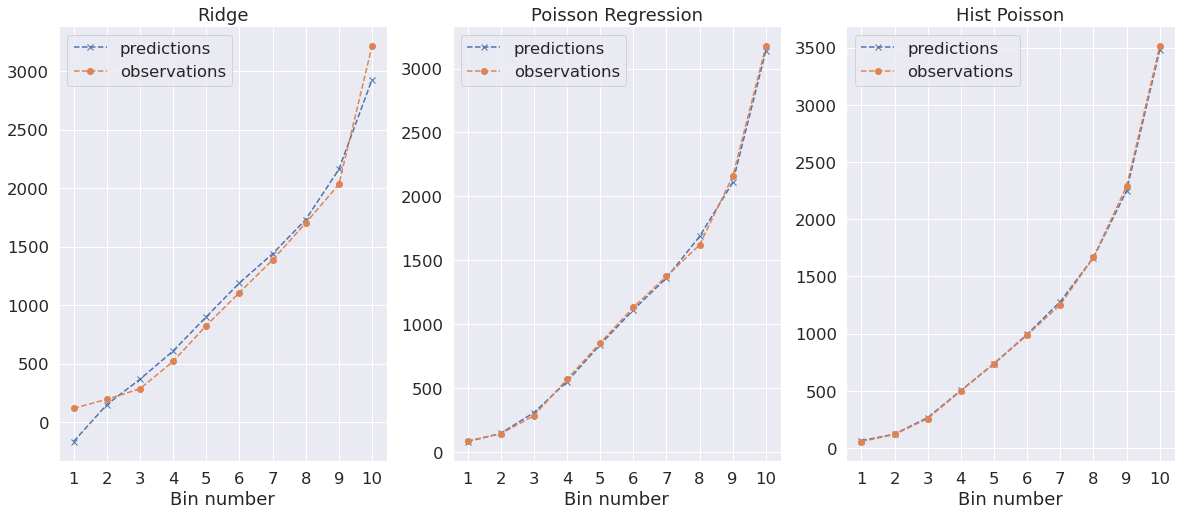

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
plot_calibration_curve_weights(y_test, ridge_pred, ax=ax1, title="Ridge")
plot_calibration_curve_weights(y_test, poisson_pred, ax=ax2, title="Poisson Regression")
plot_calibration_curve_weights(y_test, hist_poisson_pred, ax=ax3, title="Hist Poisson");

## Claims dataset

In [31]:
claims_path = data_path / "claims.csv"
claims = pd.read_csv(claims_path)

- ClaimNb: number of claims on the given policy;
- Exposure: total exposure in yearly units;
- Area: area code (categorical, ordinal);
- VehPower: power of the car (categorical, ordinal);
- VehAge: age of the car in years;
- DrivAge: age of the (most common) driver in years;
- BonusMalus: bonus-malus level between 50 and 230 (with reference level 100);
- VehBrand: car brand (categorical, nominal);
- VehGas: diesel or regular fuel car (binary);
- Density: density of inhabitants per km2 in the city of the living place of the driver;
- Region: regions in France (prior to 2016)

In [32]:
claims.head()

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,0.0,1.00,D,4.0,11.0,42.0,64.0,B2,Regular,856.0,R24
1,0.0,0.18,E,10.0,12.0,35.0,100.0,B1,Regular,4762.0,R93
2,0.0,0.08,E,6.0,4.0,53.0,50.0,B1,Diesel,3317.0,R93
3,0.0,0.36,A,5.0,2.0,44.0,50.0,B2,Diesel,35.0,R52
4,0.0,0.60,C,4.0,0.0,32.0,85.0,B12,Diesel,200.0,R73


In [33]:
exposure = claims['Exposure']

In [34]:
y = claims["ClaimNb"] / exposure

In [35]:
X = claims.drop(["Exposure", "ClaimNb"], axis="columns")

In [36]:
X.head()

,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,D,4.0,11.0,42.0,64.0,B2,Regular,856.0,R24
1,E,10.0,12.0,35.0,100.0,B1,Regular,4762.0,R93
2,E,6.0,4.0,53.0,50.0,B1,Diesel,3317.0,R93
3,A,5.0,2.0,44.0,50.0,B2,Diesel,35.0,R52
4,C,4.0,0.0,32.0,85.0,B12,Diesel,200.0,R73


### Split data

In [37]:
X_train, X_test, y_train, y_test, exposure_train, exposure_test = train_test_split(
    X, y, exposure, random_state=42)

### Train simple dummy regresor

In [38]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
dummy.fit(X_train, y_train, sample_weight=exposure_train)

DummyRegressor()

In [39]:
dummy_pred = dummy.predict(X_test)
compute_metrics(y_test, dummy_pred, sample_weight=exposure_test)

{'mse': 0.5307356741415867, 'mean poisson deviance': 0.6308647534621802}

In [40]:
dummy_pred[:10]

array([0.10038206, 0.10038206, 0.10038206, 0.10038206, 0.10038206,
       0.10038206, 0.10038206, 0.10038206, 0.10038206, 0.10038206])

## Ridge

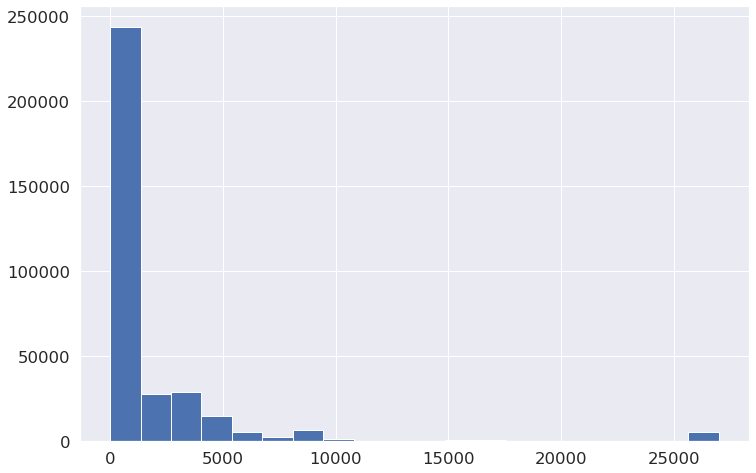

In [41]:
X['Density'].hist(bins=20);

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough",
            ["BonusMalus"]),
        ("binned_numeric", KBinsDiscretizer(n_bins=10),
            ["VehAge", "DrivAge"]),
        ("log_scaled_numeric", FunctionTransformer(np.log, validate=False),
            ["Density"]),
        ("onehot_categorical", OneHotEncoder(handle_unknown='ignore'),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"]),
    ],
)

In [43]:
linear_model_preprocessor.fit_transform(X_train)

<254254x75 sparse matrix of type '<class 'numpy.float64'>'
	with 2288282 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MaxAbsScaler

ridge = Pipeline([
    ("preprocessor", linear_model_preprocessor),
    ("scaler", MaxAbsScaler()),
    ("reg", Ridge(alpha=1e-6))])
ridge.fit(X_train, y_train, reg__sample_weight=exposure_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('passthrough_numeric',
                                                  'passthrough',
                                                  ['BonusMalus']),
                                                 ('binned_numeric',
                                                  KBinsDiscretizer(n_bins=10),
                                                  ['VehAge', 'DrivAge']),
                                                 ('log_scaled_numeric',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['Density']),
                                                 ('onehot_categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VehBrand', 'VehPower',
                                                   'VehGas', 'Region',
                                                   'Area'])])),
                ('scaler', MaxAbsScaler()), ('reg', Ridge(alpha=1e-06))])

In [45]:
ridge_pred = ridge.predict(X_test)
compute_metrics(y_test, ridge_pred, sample_weight=exposure_test)

{'mse': 0.5306782259705353, 'mean poisson deviance': 0.6051468688331222}

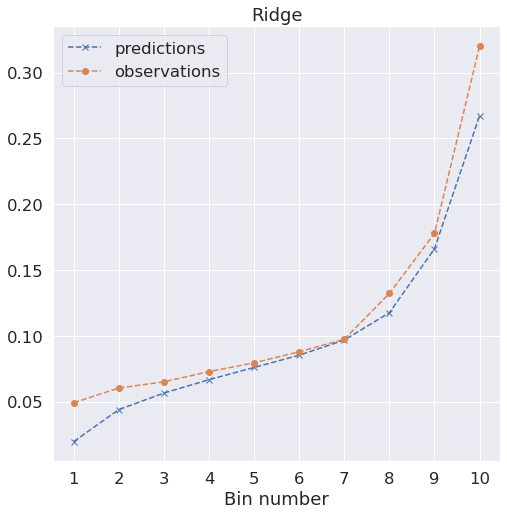

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_calibration_curve_weights(y_test, ridge_pred, ax=ax, title="Ridge", sample_weight=exposure_test);

<AxesSubplot:title={'center':'Poisson'}, xlabel='Bin number'>

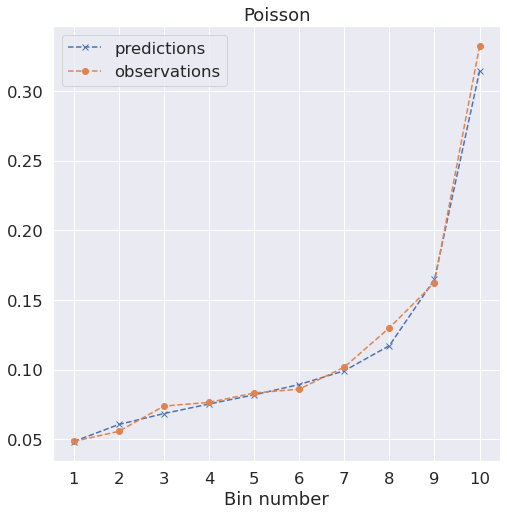

In [47]:
# %load solutions/03-ex02-solutions.py
poission_reg = Pipeline([
    ("preprocessor", linear_model_preprocessor),
    ("scaler", MaxAbsScaler()),
    ("reg", PoissonRegressor(alpha=1e-12))])

poission_reg.fit(X_train, y_train, reg__sample_weight=exposure_train)

poisson_pred = poission_reg.predict(X_test)
compute_metrics(y_test, poisson_pred, sample_weight=exposure_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_calibration_curve_weights(y_test, poisson_pred, ax=ax, title="Poisson", sample_weight=exposure_test)


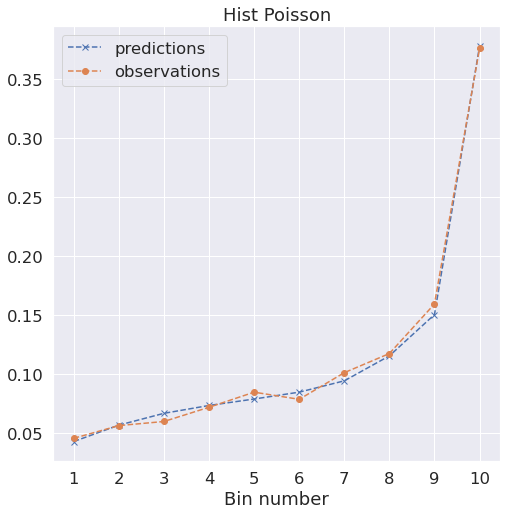

In [48]:
# %load solutions/03-ex03-solutions.py
from sklearn.preprocessing import OrdinalEncoder

tree_preprocessor = ColumnTransformer(
    [
        ("categorical", OrdinalEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"]),
        ("numeric", "passthrough",
            ["VehAge", "DrivAge", "BonusMalus", "Density"]),
    ]
)

hist_poisson = Pipeline([
    ("preprocessor", tree_preprocessor),
    ("reg", HistGradientBoostingRegressor(loss="poisson", random_state=0))
])
hist_poisson.fit(X_train, y_train, reg__sample_weight=exposure_train)

hist_poisson_pred = hist_poisson.predict(X_test)
compute_metrics(y_test, hist_poisson_pred, sample_weight=exposure_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_calibration_curve_weights(y_test, hist_poisson_pred, ax=ax, title="Hist Poisson", sample_weight=exposure_test);
